In [ ]:
!pip install pycaret

     |████████████████████████████████| 301 kB 29.2 MB/s 
     |████████████████████████████████| 1.3 MB 45.5 MB/s 
     |████████████████████████████████| 1.7 MB 49.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.8 MB 48.3 MB/s 
     |████████████████████████████████| 86 kB 6.2 MB/s 
     |████████████████████████████████| 114 kB 46.7 MB/s 
     |████████████████████████████████| 16.5 MB 37.8 MB/s 
     |████████████████████████████████| 167 kB 55.6 MB/s 
     |████████████████████████████████| 261 kB 30.7 MB/s 
     |████████████████████████████████| 2.0 MB 49.0 MB/s 
     |████████████████████████████████| 56 kB 4.4 MB/s 
     |████████████████████████████████| 636 kB 45.9 MB/s 
     |████████████████████████████████| 303 kB 51.6 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |██████████████████

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download bmabhinav889/idsintrusioncsvmodified

100% 1.59G/1.60G [00:10<00:00, 133MB/s]
100% 1.60G/1.60G [00:10<00:00, 160MB/s]


In [ ]:
! unzip /content/idsintrusioncsvmodified.zip

Archive:  /content/idsintrusioncsvmodified.zip
  inflating: new/02-14-2018.csv      
  inflating: new/02-15-2018.csv      
  inflating: new/02-16-2018.csv      
  inflating: new/02-20-2018.csv      
  inflating: new/02-21-2018.csv      
  inflating: new/02-22-2018.csv      
  inflating: new/02-23-2018.csv      
  inflating: new/02-28-2018.csv      
  inflating: new/03-01-2018.csv      
  inflating: new/03-02-2018.csv      


Merge and read multiple csv file as single

In [ ]:
'''
import os
import pandas as pd
arr=[]
c=0
directory = '/content/new'
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if f!='/content/new/.ipynb_checkpoints':
      df_temp=pd.read_csv(f)
      arr.append(df_temp)
      c+=1
      if c==3:
        break
df = pd.concat(arr)
df.head()
'''
    


In [ ]:
import pandas as pd
df=pd.read_csv("/content/new/02-14-2018.csv")
df.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


In [ ]:
df.drop(['Timestamp','Flow Byts/s','Flow Pkts/s'],axis=1,inplace = True)

In [ ]:
df.shape

(1048575, 77)

In [ ]:
df.Label.replace(['Malicious', 'Benign'], [1, 0], inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.head

<bound method NDFrame.head of          Dst Port  Protocol  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  \
0               0         0      112641719             3             0   
1               0         0      112641466             3             0   
2               0         0      112638623             3             0   
3              22         6        6453966            15            10   
4              22         6        8804066            14            11   
...           ...       ...            ...           ...           ...   
1048570        80         6       10156986             5             5   
1048571        80         6            117             2             0   
1048572        80         6        5095331             3             1   
1048573        80         6        5235511             3             1   
1048574       443         6        5807256             6             4   

         TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  \
0 

<BarContainer object of 2 artists>

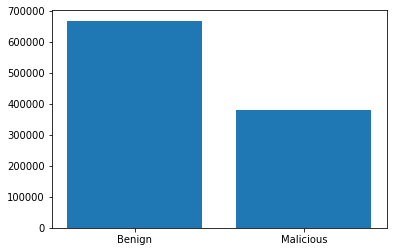

In [ ]:
import matplotlib.pyplot as plt
a=df['Label'].value_counts()
plt.bar(['Benign','Malicious'],a)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 77 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Flow Duration      1048575 non-null  int64  
 3   Tot Fwd Pkts       1048575 non-null  int64  
 4   Tot Bwd Pkts       1048575 non-null  int64  
 5   TotLen Fwd Pkts    1048575 non-null  int64  
 6   TotLen Bwd Pkts    1048575 non-null  int64  
 7   Fwd Pkt Len Max    1048575 non-null  int64  
 8   Fwd Pkt Len Min    1048575 non-null  int64  
 9   Fwd Pkt Len Mean   1048575 non-null  float64
 10  Fwd Pkt Len Std    1048575 non-null  float64
 11  Bwd Pkt Len Max    1048575 non-null  int64  
 12  Bwd Pkt Len Min    1048575 non-null  int64  
 13  Bwd Pkt Len Mean   1048575 non-null  float64
 14  Bwd Pkt Len Std    1048575 non-null  float64
 15  Flow IAT Mean      1048575 non-n

In [ ]:
import numpy as np
np.any(np.isnan(df))

False

In [ ]:
df.isnull().values.any()

False

In [ ]:
np.all(np.isfinite(df))

True

In [ ]:
df.describe()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,...,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,4.876262e+03,8.107557e+00,6.255555e+06,6.206622e+00,7.211191e+00,4.479936e+02,4.521803e+03,1.745736e+02,8.389535e+00,3.879579e+01,...,2.327970e+01,5.152449e+04,2.136151e+04,8.789157e+04,3.995477e+04,3.101206e+06,7.297218e+05,4.812391e+06,2.126920e+06,3.633016e-01
std,1.444344e+04,4.460625e+00,1.260291e+09,4.447851e+01,1.048682e+02,1.573541e+04,1.515021e+05,2.876713e+02,1.948279e+01,5.331882e+01,...,1.106185e+01,5.815586e+05,2.186405e+05,7.395725e+05,5.602693e+05,5.414780e+08,3.820031e+08,1.522117e+09,1.817013e+07,4.809509e-01
min,0.000000e+00,0.000000e+00,-9.190110e+11,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.200000e+01,6.000000e+00,7.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.300000e+01,6.000000e+00,1.023000e+03,2.000000e+00,1.000000e+00,3.600000e+01,5.500000e+01,3.400000e+01,0.000000e+00,2.566667e+01,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,6.000000e+00,4.066690e+05,7.000000e+00,6.000000e+00,4.550000e+02,7.680000e+02,1.990000e+02,0.000000e+00,5.550000e+01,...,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,6.553300e+04,1.700000e+01,1.200000e+08,5.115000e+03,9.198000e+03,8.591554e+06,1.339773e+07,6.444000e+04,1.460000e+03,1.121703e+04,...,4.800000e+01,1.102401e+08,5.723446e+07,1.102401e+08,1.102401e+08,3.394503e+11,2.432682e+11,9.797810e+11,1.260300e+10,1.000000e+00


In [ ]:
X=df.drop('Label',axis=1)
y=df['Label']



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0,shuffle=True)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(891288, 76)
(157287, 76)
(891288,)
(157287,)


In [ ]:
from pycaret.classification import setup
from pycaret.classification import compare_models
n_cols = df.shape[1]
df.columns = [str(i) for i in range(n_cols)]

grid = setup(data=df, target=df.columns[-1], html=False, silent=True, verbose=False)

best = compare_models()

print(best)

RuntimeError: ignored

RuntimeError: ignored

RuntimeError: ignored

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.977,0.9958,0.9929,0.9467,0.9692,0.9509,0.9517,64.622


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9770,0.9958,0.9929,0.9467,0.9692,0.9509,0.9517,64.622
nb,Naive Bayes,0.6592,0.7638,1.0000,0.5172,0.6815,0.3874,0.4900,1.338


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.648
lr,Logistic Regression,0.9770,0.9958,0.9929,0.9467,0.9692,0.9509,0.9517,64.622
nb,Naive Bayes,0.6592,0.7638,1.0000,0.5172,0.6815,0.3874,0.4900,1.338


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.648
lr,Logistic Regression,0.9770,0.9958,0.9929,0.9467,0.9692,0.9509,0.9517,64.622
svm,SVM - Linear Kernel,0.8834,0.0000,0.7749,0.8905,0.8277,0.7403,0.7454,27.296
nb,Naive Bayes,0.6592,0.7638,1.0000,0.5172,0.6815,0.3874,0.4900,1.338


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.648
ridge,Ridge Classifier,0.9973,0.0000,1.0000,0.9925,0.9962,0.9941,0.9941,0.918
lr,Logistic Regression,0.9770,0.9958,0.9929,0.9467,0.9692,0.9509,0.9517,64.622
svm,SVM - Linear Kernel,0.8834,0.0000,0.7749,0.8905,0.8277,0.7403,0.7454,27.296
nb,Naive Bayes,0.6592,0.7638,1.0000,0.5172,0.6815,0.3874,0.4900,1.338


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.648
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,59.718
ridge,Ridge Classifier,0.9973,0.0000,1.0000,0.9925,0.9962,0.9941,0.9941,0.918
lr,Logistic Regression,0.9770,0.9958,0.9929,0.9467,0.9692,0.9509,0.9517,64.622
svm,SVM - Linear Kernel,0.8834,0.0000,0.7749,0.8905,0.8277,0.7403,0.7454,27.296
nb,Naive Bayes,0.6592,0.7638,1.0000,0.5172,0.6815,0.3874,0.4900,1.338


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.648
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,59.718
ridge,Ridge Classifier,0.9973,0.0000,1.0000,0.9925,0.9962,0.9941,0.9941,0.918
lr,Logistic Regression,0.9770,0.9958,0.9929,0.9467,0.9692,0.9509,0.9517,64.622
svm,SVM - Linear Kernel,0.8834,0.0000,0.7749,0.8905,0.8277,0.7403,0.7454,27.296
nb,Naive Bayes,0.6592,0.7638,1.0000,0.5172,0.6815,0.3874,0.4900,1.338
qda,Quadratic Discriminant Analysis,0.6363,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,6.910


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.648
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,59.718
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,93.807
ridge,Ridge Classifier,0.9973,0.0000,1.0000,0.9925,0.9962,0.9941,0.9941,0.918
lr,Logistic Regression,0.9770,0.9958,0.9929,0.9467,0.9692,0.9509,0.9517,64.622
svm,SVM - Linear Kernel,0.8834,0.0000,0.7749,0.8905,0.8277,0.7403,0.7454,27.296
nb,Naive Bayes,0.6592,0.7638,1.0000,0.5172,0.6815,0.3874,0.4900,1.338
qda,Quadratic Discriminant Analysis,0.6363,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,6.910


In [ ]:
from pycaret.classification import setup
from pycaret.classification import tune_model
from sklearn.linear_model import LogisticRegression
n_cols = df.shape[1]
df.columns = [str(i) for i in range(n_cols)]

grid = setup(data=df, target=df.columns[-1], html=False, silent=True, verbose=False)
# tune model hyperparameters
best = tune_model(LogisticRegression(), n_iter=20, choose_better=True)
# report the best model
print(best)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 26.3min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 106.8min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 108.8min finished


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9765,0.9952,0.9988,0.9401,0.9686,0.9498,0.9509
1,0.9780,0.9977,0.9996,0.9432,0.9706,0.9531,0.9541
2,0.9750,0.9951,0.9985,0.9369,0.9667,0.9468,0.9480
3,0.9715,0.9948,0.9988,0.9282,0.9622,0.9393,0.9410
4,0.9720,0.9898,0.9985,0.9296,0.9628,0.9404,0.9420
5,0.9753,0.9972,0.9993,0.9368,0.9670,0.9473,0.9486
6,0.9683,0.9942,0.9983,0.9210,0.9581,0.9327,0.9347
7,0.9667,0.9873,0.9990,0.9168,0.9561,0.9294,0.9316
8,0.9696,0.9926,0.9986,0.9238,0.9597,0.9353,0.9372
9,0.9714,0.9959,0.9983,0.9283,0.9620,0.9391,0.9407


LogisticRegression(C=0.417, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


True

In [ ]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(C=0.417, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False).fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

y_pred = clf.predict(X_test)
print(f1_score(y_test, y_pred, average="macro"))

print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro")) 

0.9765097152537785
0.9725034025288389
0.9811589822425537


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
y_pred=clf.predict(X_test)
from sklearn.metrics import confusion_matrix
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
# Accuracy
from sklearn.metrics import accuracy_score
print("Test Accuracy :",end=" ")
print(accuracy_score(y_test, y_pred))
# Recall
from sklearn.metrics import recall_score
print("Reacll :",end=" ")
print(recall_score(y_test, y_pred, average=None))
# Precision
from sklearn.metrics import precision_score
print("Test Precision :",end=" ")
print(precision_score(y_test, y_pred, average=None))

Confusion matrix:
[[88366 11850]
 [   63 57008]]
Test Accuracy : 0.9242594747181904
Reacll : [0.88175541 0.99889611]
Test Precision : [0.99928756 0.82790671]


Saving model

In [ ]:
import pickle
filename = '/content/First_model.sav'
pickle.dump(clf, open(filename, 'wb'))

Loading model

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred)


0.9403257600893489

2ND Model

In [ ]:
import pandas as pd
df1=pd.read_csv("/content/new/02-15-2018.csv")
df1.head()
df1.drop(['Timestamp','Flow Byts/s','Flow Pkts/s'],axis=1,inplace = True)
df1.Label.replace(['Malicious', 'Benign'], [1, 0], inplace=True)
df1.dropna(inplace=True)

<BarContainer object of 2 artists>

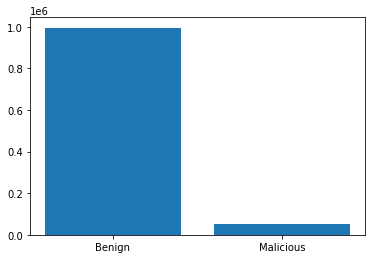

In [ ]:
import matplotlib.pyplot as plt
a=df1['Label'].value_counts()
plt.bar(['Benign','Malicious'],a)

In [ ]:
X1=df1.drop('Label',axis=1)
y_test=df1['Label']




In [ ]:
from pycaret.classification import setup
from pycaret.classification import compare_models
n_cols = df1.shape[1]
df1.columns = [str(i) for i in range(n_cols)]

grid = setup(data=df1, target=df1.columns[-1], html=False, silent=True, verbose=False)

best = compare_models()

print(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9729,0.7729,0.5319,0.8785,0.6626,0.6494,0.6716,139.531


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9989,0.9990,0.9940,0.9837,0.9888,0.9882,0.9882,80.884
lr,Logistic Regression,0.9729,0.7729,0.5319,0.8785,0.6626,0.6494,0.6716,139.531


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9989,0.9990,0.9940,0.9837,0.9888,0.9882,0.9882,80.884
lr,Logistic Regression,0.9729,0.7729,0.5319,0.8785,0.6626,0.6494,0.6716,139.531
nb,Naive Bayes,0.8608,0.8651,0.2443,0.1076,0.1493,0.0858,0.0945,0.863


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,1.0000,0.9999,0.9999,0.9999,0.9999,0.9999,5.117
knn,K Neighbors Classifier,0.9989,0.9990,0.9940,0.9837,0.9888,0.9882,0.9882,80.884
lr,Logistic Regression,0.9729,0.7729,0.5319,0.8785,0.6626,0.6494,0.6716,139.531
nb,Naive Bayes,0.8608,0.8651,0.2443,0.1076,0.1493,0.0858,0.0945,0.863


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,1.0000,0.9999,0.9999,0.9999,0.9999,0.9999,5.117
knn,K Neighbors Classifier,0.9989,0.9990,0.9940,0.9837,0.9888,0.9882,0.9882,80.884
lr,Logistic Regression,0.9729,0.7729,0.5319,0.8785,0.6626,0.6494,0.6716,139.531
svm,SVM - Linear Kernel,0.9161,0.0000,0.5032,0.3120,0.3759,0.3350,0.3507,36.420
nb,Naive Bayes,0.8608,0.8651,0.2443,0.1076,0.1493,0.0858,0.0945,0.863


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,1.0000,0.9999,0.9999,0.9999,0.9999,0.9999,5.117
knn,K Neighbors Classifier,0.9989,0.9990,0.9940,0.9837,0.9888,0.9882,0.9882,80.884
ridge,Ridge Classifier,0.9956,0.0000,0.9548,0.9572,0.9560,0.9537,0.9537,0.926
lr,Logistic Regression,0.9729,0.7729,0.5319,0.8785,0.6626,0.6494,0.6716,139.531
svm,SVM - Linear Kernel,0.9161,0.0000,0.5032,0.3120,0.3759,0.3350,0.3507,36.420
nb,Naive Bayes,0.8608,0.8651,0.2443,0.1076,0.1493,0.0858,0.0945,0.863


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,1.0000,0.9999,0.9999,0.9999,0.9999,0.9999,5.117
rf,Random Forest Classifier,1.0000,1.0000,0.9997,0.9999,0.9998,0.9998,0.9998,87.985
knn,K Neighbors Classifier,0.9989,0.9990,0.9940,0.9837,0.9888,0.9882,0.9882,80.884
ridge,Ridge Classifier,0.9956,0.0000,0.9548,0.9572,0.9560,0.9537,0.9537,0.926
lr,Logistic Regression,0.9729,0.7729,0.5319,0.8785,0.6626,0.6494,0.6716,139.531
svm,SVM - Linear Kernel,0.9161,0.0000,0.5032,0.3120,0.3759,0.3350,0.3507,36.420
nb,Naive Bayes,0.8608,0.8651,0.2443,0.1076,0.1493,0.0858,0.0945,0.863


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,1.0000,0.9999,0.9999,0.9999,0.9999,0.9999,5.117
rf,Random Forest Classifier,1.0000,1.0000,0.9997,0.9999,0.9998,0.9998,0.9998,87.985
knn,K Neighbors Classifier,0.9989,0.9990,0.9940,0.9837,0.9888,0.9882,0.9882,80.884
ridge,Ridge Classifier,0.9956,0.0000,0.9548,0.9572,0.9560,0.9537,0.9537,0.926
lr,Logistic Regression,0.9729,0.7729,0.5319,0.8785,0.6626,0.6494,0.6716,139.531
qda,Quadratic Discriminant Analysis,0.9501,0.5013,0.0026,0.8000,0.0050,0.0048,0.0304,7.943
svm,SVM - Linear Kernel,0.9161,0.0000,0.5032,0.3120,0.3759,0.3350,0.3507,36.420
nb,Naive Bayes,0.8608,0.8651,0.2443,0.1076,0.1493,0.0858,0.0945,0.863


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,1.0000,0.9999,0.9999,0.9999,0.9999,0.9999,5.117
rf,Random Forest Classifier,1.0000,1.0000,0.9997,0.9999,0.9998,0.9998,0.9998,87.985
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,99.291
knn,K Neighbors Classifier,0.9989,0.9990,0.9940,0.9837,0.9888,0.9882,0.9882,80.884
ridge,Ridge Classifier,0.9956,0.0000,0.9548,0.9572,0.9560,0.9537,0.9537,0.926
lr,Logistic Regression,0.9729,0.7729,0.5319,0.8785,0.6626,0.6494,0.6716,139.531
qda,Quadratic Discriminant Analysis,0.9501,0.5013,0.0026,0.8000,0.0050,0.0048,0.0304,7.943
svm,SVM - Linear Kernel,0.9161,0.0000,0.5032,0.3120,0.3759,0.3350,0.3507,36.420
nb,Naive Bayes,0.8608,0.8651,0.2443,0.1076,0.1493,0.0858,0.0945,0.863


In [ ]:
from pycaret.classification import setup
from pycaret.classification import tune_model
from sklearn.neighbors import KNeighborsClassifier
n_cols = df1.shape[1]
df1.columns = [str(i) for i in range(n_cols)]

grid = setup(data=df1, target=df1.columns[-1], html=False, silent=True, verbose=False)
# tune model hyperparameters
best = tune_model(KNeighborsClassifier(), n_iter=10, choose_better=True)
# report the best model

print(best)

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 62.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 118.6min finished


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9991,0.9996,0.9976,0.9853,0.9914,0.9909,0.9909
1,0.9988,0.9992,0.9957,0.9807,0.9881,0.9875,0.9875
2,0.9987,0.9996,0.9970,0.9784,0.9876,0.9870,0.9870
3,0.9988,0.9996,0.9959,0.9807,0.9883,0.9877,0.9877
4,0.9989,0.9996,0.9962,0.9821,0.9891,0.9885,0.9885
5,0.9991,0.9993,0.9973,0.9852,0.9912,0.9908,0.9908
6,0.9991,0.9990,0.9962,0.9852,0.9907,0.9902,0.9902
7,0.9990,0.9989,0.9976,0.9826,0.9900,0.9895,0.9895
8,0.9990,0.9993,0.9959,0.9850,0.9904,0.9899,0.9899
9,0.9989,0.9995,0.9957,0.9823,0.9889,0.9884,0.9884


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y_test, test_size=0.15, random_state=0,shuffle=True)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(df1.shape)

(891288, 76)
(157287, 76)
(891288,)
(157287,)
(1048575, 77)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
clf.fit(X_train,y_train)


KNeighborsClassifier()

In [ ]:
y_pred = clf.predict(X_test)
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro")) 

0.9952160237461904
0.9926183006131607
0.9978446315917608


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, clf.predict(X_test)))
y_pred=clf.predict(X_test)
from sklearn.metrics import confusion_matrix
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
# Accuracy
from sklearn.metrics import accuracy_score
print("Test Accuracy :",end=" ")
print(accuracy_score(y_test, y_pred))
# Recall
from sklearn.metrics import recall_score
print("Reacll :",end=" ")
print(recall_score(y_test, y_pred, average=None))
# Precision
from sklearn.metrics import precision_score
print("Test Precision :",end=" ")
print(precision_score(y_test, y_pred, average=None))

0.9990781183441734
Confusion matrix:
[[149232    117]
 [    28   7910]]
Test Accuracy : 0.9990781183441734
Reacll : [0.9992166  0.99647266]
Test Precision : [0.99981241 0.98542419]


Saving 2nd model

In [ ]:
import pickle
filename = '/content/Second_model.sav'
pickle.dump(clf, open(filename, 'wb'))

6th

In [ ]:
import pandas as pd
df1=pd.read_csv("/content/new/02-22-2018.csv")
df1.head()
df1.drop(['Timestamp','Flow Byts/s','Flow Pkts/s'],axis=1,inplace = True)
df1.Label.replace(['Malicious', 'Benign'], [1, 0], inplace=True)
df1.dropna(inplace=True)
X1=df1.drop('Label',axis=1)
y1=df1['Label']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.15, random_state=0,shuffle=True)




<BarContainer object of 2 artists>

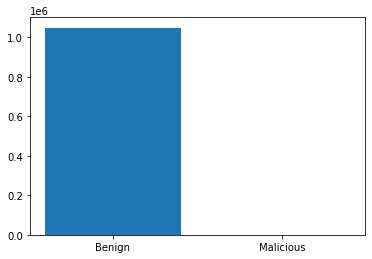

In [ ]:
import matplotlib.pyplot as plt
a=df1['Label'].value_counts()
plt.bar(['Benign','Malicious'],a)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(df1.shape)

(891288, 76)
(157287, 76)
(891288,)
(157287,)
(1048575, 77)


In [ ]:
from pycaret.classification import setup
from pycaret.classification import compare_models
n_cols = df1.shape[1]
df1.columns = [str(i) for i in range(n_cols)]

grid = setup(data=df1, target=df1.columns[-1], html=False, silent=True, verbose=False)

best = compare_models()

print(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9915,0.5537,0.1545,0.3077,0.1508,0.1504,0.18,39.696


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9998,0.9548,0.7245,0.8258,0.7689,0.7689,0.7719,383.263
lr,Logistic Regression,0.9915,0.5537,0.1545,0.3077,0.1508,0.1504,0.1800,39.696


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9998,0.9548,0.7245,0.8258,0.7689,0.7689,0.7719,383.263
lr,Logistic Regression,0.9915,0.5537,0.1545,0.3077,0.1508,0.1504,0.1800,39.696
nb,Naive Bayes,0.2309,0.6171,1.0000,0.0004,0.0009,0.0002,0.0102,0.848


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,0.9783,0.9566,0.9614,0.9584,0.9584,0.9587,14.175
knn,K Neighbors Classifier,0.9998,0.9548,0.7245,0.8258,0.7689,0.7689,0.7719,383.263
lr,Logistic Regression,0.9915,0.5537,0.1545,0.3077,0.1508,0.1504,0.1800,39.696
nb,Naive Bayes,0.2309,0.6171,1.0000,0.0004,0.0009,0.0002,0.0102,0.848


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,0.9783,0.9566,0.9614,0.9584,0.9584,0.9587,14.175
knn,K Neighbors Classifier,0.9998,0.9548,0.7245,0.8258,0.7689,0.7689,0.7719,383.263
lr,Logistic Regression,0.9915,0.5537,0.1545,0.3077,0.1508,0.1504,0.1800,39.696
svm,SVM - Linear Kernel,0.7371,0.0000,0.1254,0.0001,0.0003,-0.0003,-0.0057,7.280
nb,Naive Bayes,0.2309,0.6171,1.0000,0.0004,0.0009,0.0002,0.0102,0.848


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,0.9783,0.9566,0.9614,0.9584,0.9584,0.9587,14.175
knn,K Neighbors Classifier,0.9998,0.9548,0.7245,0.8258,0.7689,0.7689,0.7719,383.263
ridge,Ridge Classifier,0.9996,0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,1.188
lr,Logistic Regression,0.9915,0.5537,0.1545,0.3077,0.1508,0.1504,0.1800,39.696
svm,SVM - Linear Kernel,0.7371,0.0000,0.1254,0.0001,0.0003,-0.0003,-0.0057,7.280
nb,Naive Bayes,0.2309,0.6171,1.0000,0.0004,0.0009,0.0002,0.0102,0.848


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,0.9783,0.9566,0.9614,0.9584,0.9584,0.9587,14.175
rf,Random Forest Classifier,1.0000,1.0000,0.9329,1.0000,0.9650,0.9649,0.9657,119.420
knn,K Neighbors Classifier,0.9998,0.9548,0.7245,0.8258,0.7689,0.7689,0.7719,383.263
ridge,Ridge Classifier,0.9996,0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,1.188
lr,Logistic Regression,0.9915,0.5537,0.1545,0.3077,0.1508,0.1504,0.1800,39.696
svm,SVM - Linear Kernel,0.7371,0.0000,0.1254,0.0001,0.0003,-0.0003,-0.0057,7.280
nb,Naive Bayes,0.2309,0.6171,1.0000,0.0004,0.0009,0.0002,0.0102,0.848


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,0.9783,0.9566,0.9614,0.9584,0.9584,0.9587,14.175
rf,Random Forest Classifier,1.0000,1.0000,0.9329,1.0000,0.9650,0.9649,0.9657,119.420
knn,K Neighbors Classifier,0.9998,0.9548,0.7245,0.8258,0.7689,0.7689,0.7719,383.263
ridge,Ridge Classifier,0.9996,0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,1.188
qda,Quadratic Discriminant Analysis,0.9993,0.9740,0.9491,0.3372,0.4928,0.4925,0.5622,9.057
lr,Logistic Regression,0.9915,0.5537,0.1545,0.3077,0.1508,0.1504,0.1800,39.696
svm,SVM - Linear Kernel,0.7371,0.0000,0.1254,0.0001,0.0003,-0.0003,-0.0057,7.280
nb,Naive Bayes,0.2309,0.6171,1.0000,0.0004,0.0009,0.0002,0.0102,0.848


In [ ]:
from pycaret.classification import setup
from pycaret.classification import tune_model
from sklearn.linear_model import LogisticRegression
n_cols = df1.shape[1]
df1.columns = [str(i) for i in range(n_cols)]

grid = setup(data=df1, target=df1.columns[-1], html=False, silent=True, verbose=False)
# tune model hyperparameters
best = tune_model(LogisticRegression(), n_iter=2, choose_better=True)
# report the best model
print(best)

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 10.7min finished


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9996,0.4702,0.0400,0.2000,0.0667,0.0666,0.0893
1,0.9997,0.4530,0.0800,0.6667,0.1429,0.1428,0.2309
2,0.9998,0.5820,0.2500,1.0000,0.4000,0.3999,0.4999
3,0.9997,0.4239,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9997,0.6712,0.2917,0.4667,0.3590,0.3588,0.3688
5,0.9996,0.4309,0.0000,0.0000,0.0000,-0.0001,-0.0001
6,0.9997,0.6123,0.1667,1.0000,0.2857,0.2856,0.4082
7,0.9997,0.5994,0.2800,0.5833,0.3784,0.3782,0.4040
8,0.9998,0.6908,0.3600,0.9000,0.5143,0.5142,0.5691
9,0.9997,0.5672,0.1600,0.8000,0.2667,0.2666,0.3577


LogisticRegression(C=7.653, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(C=7.653, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False).fit(X_train,y_train)

In [ ]:
y_pred = clf.predict(X_test)
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro")) 

0.7285110159852611
0.9998791894246237
0.6481481481481481


In [ ]:
y_pred=clf.predict(X_test)
from sklearn.metrics import confusion_matrix
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
# Accuracy
from sklearn.metrics import accuracy_score
print("Test Accuracy :",end=" ")
print(accuracy_score(y_test, y_pred))
# Recall
from sklearn.metrics import recall_score
print("Reacll :",end=" ")
print(recall_score(y_test, y_pred, average=None))
# Precision
from sklearn.metrics import precision_score
print("Test Precision :",end=" ")
print(precision_score(y_test, y_pred, average=None))

Confusion matrix:
[[157233      0]
 [    38     16]]
Test Accuracy : 0.9997584034281282
Reacll : [1.        0.2962963]
Test Precision : [0.99975838 1.        ]


Saving 6th model

In [ ]:
import pickle
filename = '/content/Sixth_model.sav'
pickle.dump(clf, open(filename, 'wb'))

Loading models

In [ ]:
# load the model from disk
import pickle
!pip install sklearn
import sklearn.neighbors._base
First_model = pickle.load(open('/content/drive/MyDrive/BI/First_model.sav', 'rb'))
Second_model=pickle.load(open('/content/drive/MyDrive/BI/Second_model.sav', 'rb'))
Sixth_model=pickle.load(open('/content/drive/MyDrive/BI/Sixth_model.sav', 'rb'))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.23.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


ModuleNotFoundError: ignored

In [ ]:
import pandas as pd
df1=pd.read_csv("/content/new/02-15-2018.csv")
df1.drop(['Timestamp','Flow Byts/s','Flow Pkts/s'],axis=1,inplace = True)
df1.Label.replace(['Malicious', 'Benign'], [1, 0], inplace=True)
df1.dropna(inplace=True)
X1=df1.drop('Label',axis=1)
y1=df1['Label']
X1.head()



In [ ]:
print(X1.shape)
print(y1.shape)

(1048575, 76)
(1048575,)


In [ ]:
p1=First_model.predict(X1)
p2=Second_model.predict(X1)
p6=Sixth_model.predict(X1)


In [ ]:
y_pred=[]
one=0
zero=0
for i in range(len(p1)):
  one=0
  zero=0
  if p1[i]==0:
    zero+=1
  elif p1[i]==1:
    one+=1
  if p2[i]==0:
    zero+=1
  elif p2[i]==1:
    one+=1
  if p6[i]==0:
    zero+=1
  elif p6[i]==1:
    one+=1
  if one>=zero:
    y_pred.append(1)
  else:
    y_pred.append(0)

  


In [ ]:
#y_pred = clf.predict(X_test)
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro")) 

In [ ]:

from sklearn.metrics import confusion_matrix
print("Confusion matrix:")
print(confusion_matrix(y1, y_pred))
# Accuracy
from sklearn.metrics import accuracy_score
print("Test Accuracy :",end=" ")
print(accuracy_score(y1, y_pred))
# Recall
from sklearn.metrics import recall_score
print("Reacll :",end=" ")
print(recall_score(y1, y_pred, average=None))
# Precision
from sklearn.metrics import precision_score
print("Test Precision :",end=" ")
print(precision_score(y1, y_pred, average=None))

Confusion matrix:
[[996052     25]
 [ 51558    940]]
Test Accuracy : 0.9508065708223065
Reacll : [0.9999749  0.01790544]
Test Precision : [0.95078512 0.97409326]
